In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
    
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
    
from keras.models import Model

np.random.seed(0)

2022-08-26 00:56:24.035859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 00:56:24.035894: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
    
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


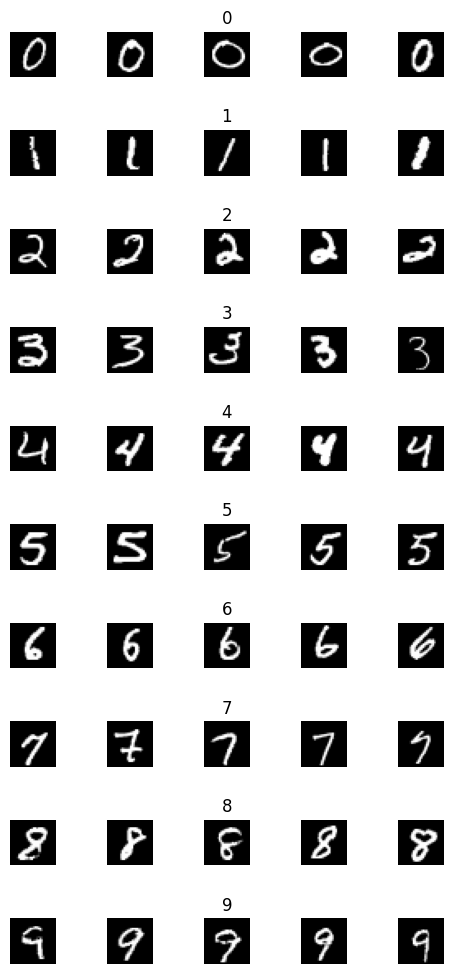

In [4]:
num_of_samples=[]
    
cols = 5
num_classes = 10
    
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
    
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
print(num_of_samples)

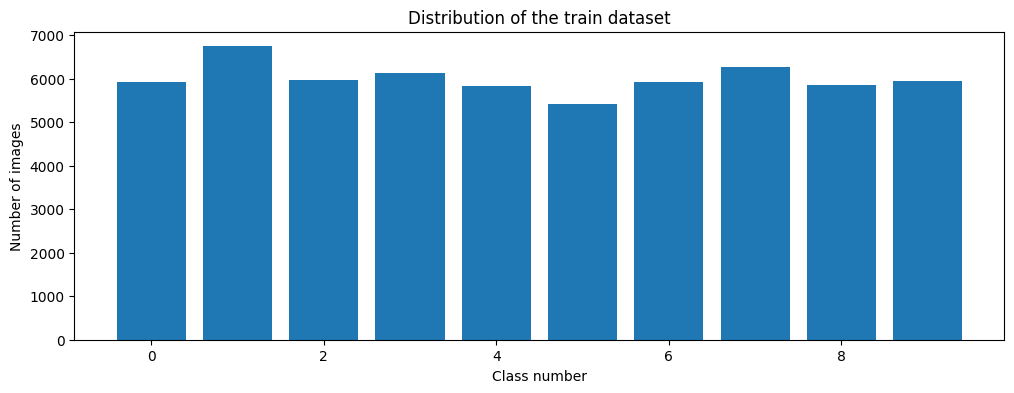

In [5]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
    
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
    
X_train = X_train/255
X_test = X_test/255

In [7]:
def leNet_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

2022-08-26 00:56:28.058028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 00:56:28.058388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 00:56:28.058454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-26 00:56:28.058516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-26 00:56:28.058569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/10
135/135 [==============================] - 16s 117ms/step - loss: 0.2272 - accuracy: 0.9277 - val_loss: 0.0549 - val_accuracy: 0.9847
Epoch 2/10
135/135 [==============================] - 16s 115ms/step - loss: 0.0690 - accuracy: 0.9795 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 3/10
135/135 [==============================] - 17s 122ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.0391 - val_accuracy: 0.9890
Epoch 4/10
135/135 [==============================] - 18s 131ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 5/10
135/135 [==============================] - 18s 135ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0414 - val_accuracy: 0.9887
Epoch 6/10
135/135 [==============================] - 17s 129ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0459 - val_accuracy: 0.9872
Epoch 7/10
135/135 [==============================] - 16s 119ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0416 - val_ac

Text(0.5, 0, 'epoch')

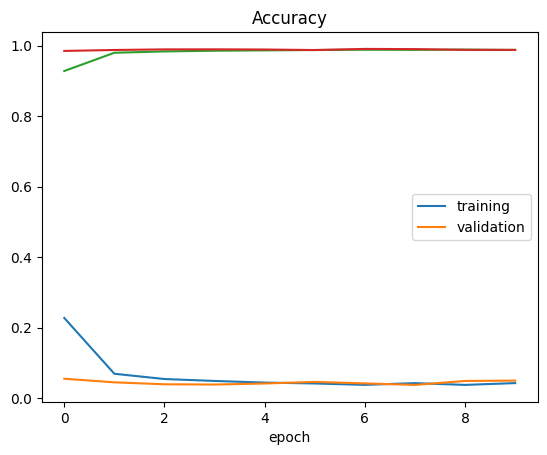

In [8]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Test score: 0.041144344955682755
Test accuracy: 0.9897000193595886


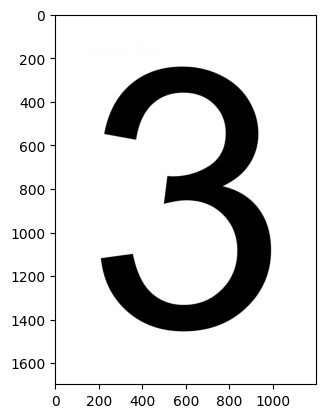

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
    
print('Test score:', score[0])
print('Test accuracy:', score[1])

#predict internet number
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
    
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
    


(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 124ms/step
predicted digit: [3]


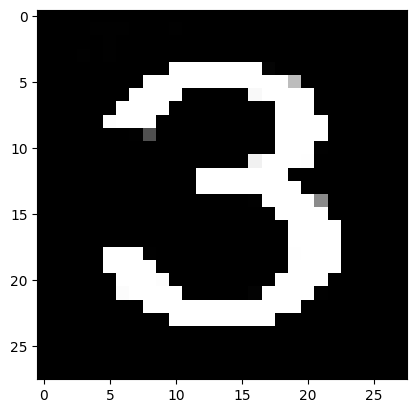

In [10]:
import cv2
import numpy as np
    
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
    
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
    
print(img.shape)

predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)


print("predicted digit: "+str(classes_x))
    



In [11]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
    
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
    
print(visual_layer1.shape)
print(visual_layer2.shape)
    


1/1 [==============================] - 0s 48ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


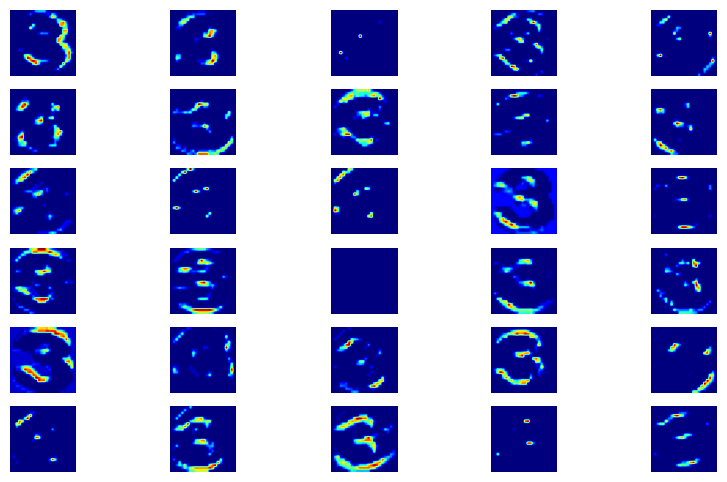

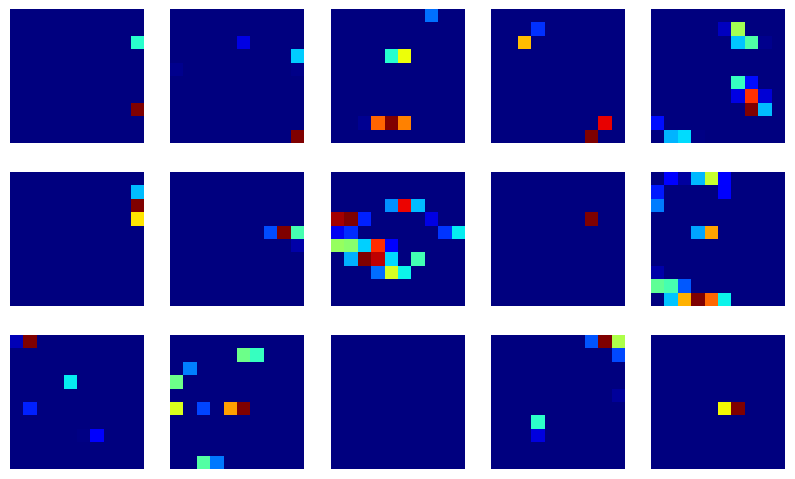

In [12]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
    
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')